In [30]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df=pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [31]:
print(df['PRICE'].value_counts())

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: PRICE, Length: 229, dtype: int64


In [32]:
# Although, 'native_country' has a lot of unique categories, most categories only have a few observations
print(df['PRICE'].value_counts().sort_values(ascending=False).head(10))

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
19.4     6
20.6     6
20.0     5
22.6     5
22.2     5
Name: PRICE, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


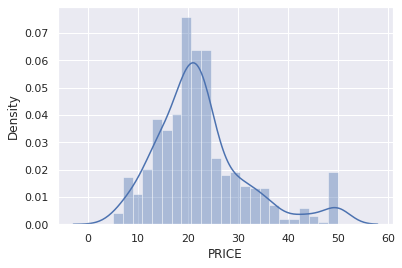

In [33]:
#invite people for the Kaggle party
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.distplot(df['PRICE']);



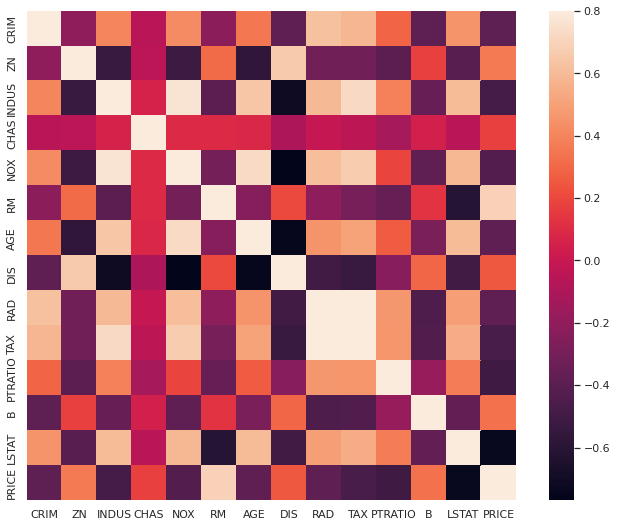

In [34]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

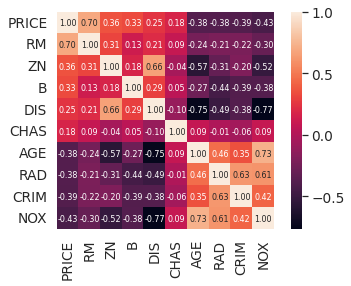

In [35]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


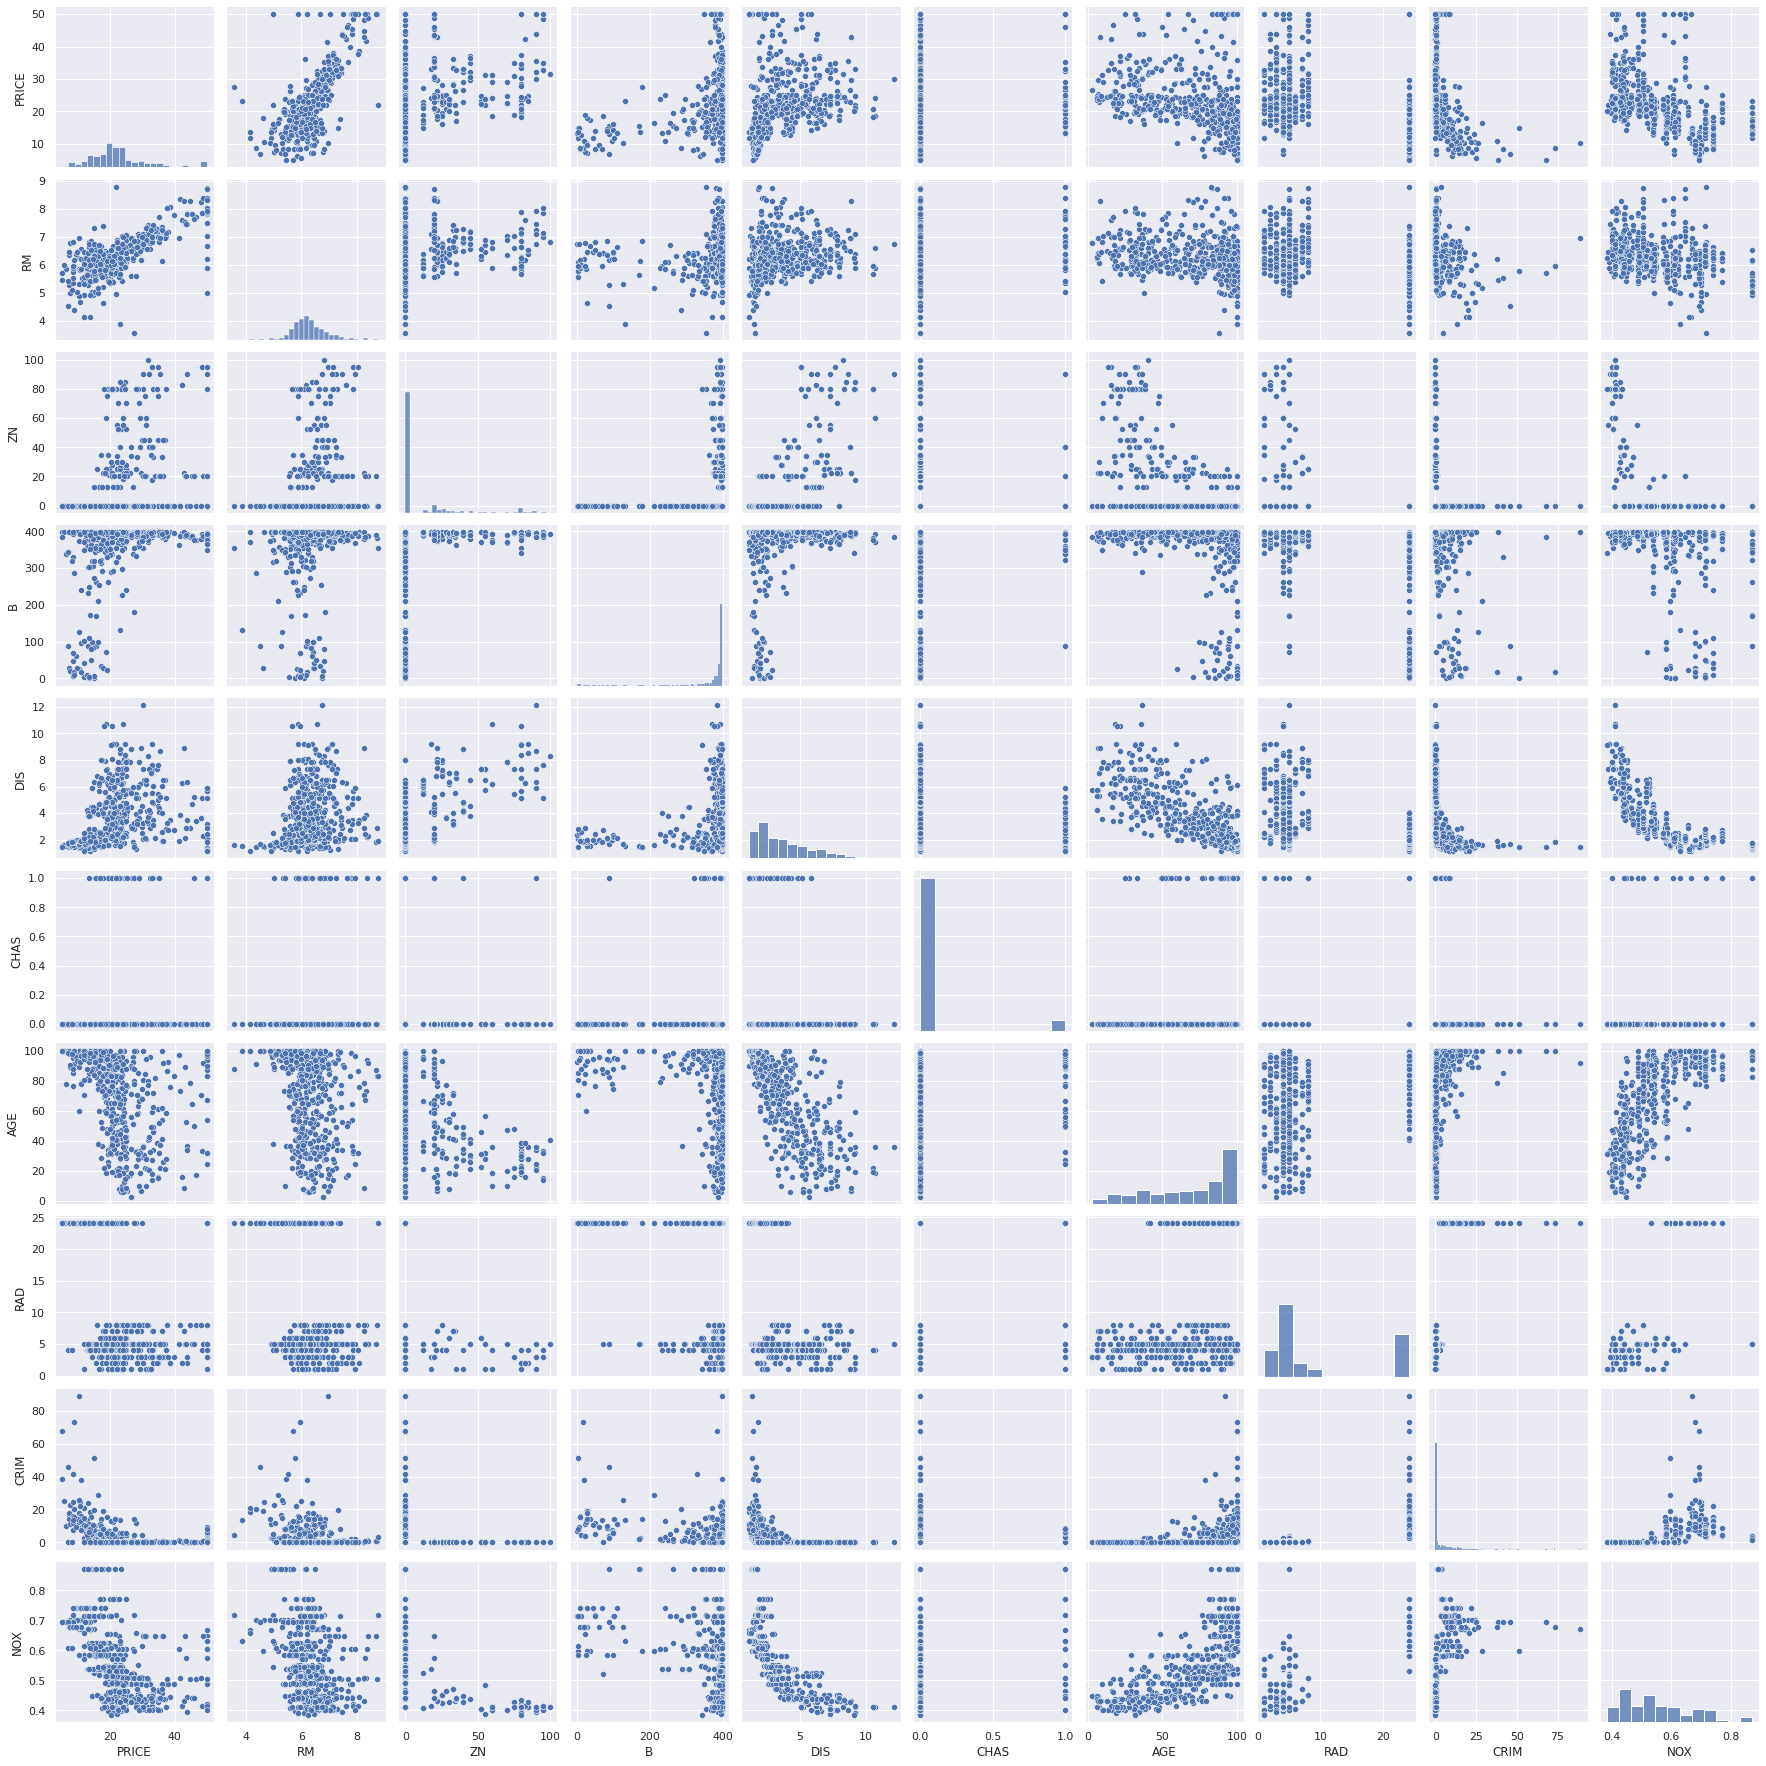

In [36]:
#scatterplot
sns.set()
cols = ['PRICE', 'RM', 'ZN', 'B', 'DIS', 'CHAS', 'AGE', 'RAD', 'CRIM', 'NOX']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [37]:
x = df.drop('PRICE', 1)
y = df.PRICE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [38]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [39]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [40]:
x.shape

(506, 13)

In [41]:
x.isnull().sum().sort_values(ascending=False).head()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
dtype: int64

In [42]:
# from itertools import combinations
# from sklearn.preprocessing import PolynomialFeatures

# def add_interactions(df):
#     # Get feature names
#     combos = list(combinations(list(df.columns), 2))
#     colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
#     # Find interactions
#     poly = PolynomialFeatures(interaction_only=True, include_bias=False)
#     df = poly.fit_transform(df)
#     df = pd.DataFrame(df)
#     df.columns = colnames
    
#     # Remove interaction terms with all 0 values            
#     noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
#     df = df.drop(df.columns[noint_indicies], axis=1)
    
#     return df

# x = add_interactions(x)
# print(x.head(5))

In [43]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# x = pd.DataFrame(pca.fit_transform(x))

# print(x.head(5))

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)


In [45]:

# import sklearn.feature_selection

# select = sklearn.feature_selection.SelectKBest(k=20)
# selected_features = select.fit(X_train, y_train)
# indices_selected = selected_features.get_support(indices=True)
# colnames_selected = [x.columns[i] for i in indices_selected]

# X_train_selected = X_train[colnames_selected]
# X_test_selected = X_test[colnames_selected]

## LINEAR REGRESSION

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
pred_train_lr= lr.predict(X_train)
r2_score_train_lr=r2_score(y_train, pred_train_lr)
print("accuracy x_train r2_score: ",r2_score_train_lr)
pred_test_lr= lr.predict(X_test)
r2_score_test_lr=r2_score(y_test, pred_test_lr)
print("accuracy x_test  r2_score: ",r2_score_test_lr)

accuracy x_train r2_score:  0.7103879080674731
accuracy x_test  r2_score:  0.7836295385076315


# KFOLD + linear regression

In [47]:
from sklearn.model_selection import KFold

# Use KFold
kf = KFold(n_splits=19, shuffle=True, random_state=1111)
x.to_numpy()
y.to_numpy()
# Create splits
splits = kf.split(x)
for train_index, val_index in splits:
    # Setup the training and validation data
   
    X_train, y_train = x.iloc[train_index], y.iloc[train_index]
    X_test, y_test = x.iloc[val_index], y.iloc[val_index]

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_train_lr= lr.predict(X_train)
r2_score_train_lr=r2_score(y_train, pred_train_lr)
print(r2_score_train_lr)
pred_test_lr= lr.predict(X_test)
r2_score_test_lr=r2_score(y_test, pred_test_lr)
print(r2_score_test_lr)

0.7415580553012728
0.7142904668930536


## Gradient boosting+ kfold

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train,y_train)
GradientBoostingRegressor(random_state=0)
pred_train_lr= reg.predict(X_train)
r2_score_train_lr=r2_score(y_train, pred_train_lr)
print(r2_score_train_lr)
pred_test_lr= lr.predict(X_test)
r2_score_test_lr=r2_score(y_test, pred_test_lr)
print(r2_score_test_lr)


0.9753173945054676
0.7142904668930536


# RANDOM FOREST +kfold

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train, y_train)
pred_train_rf= rf.predict(X_train)

r2_score_train_rf=r2_score(y_train, pred_train_rf)
print(r2_score_train_rf)
pred_test_rf= rf.predict(X_test)
r2_score_test_rf=r2_score(y_test, pred_test_rf)
print(r2_score_test_rf)

0.9831754963690248
0.9238885389601927


# 4 Regression models 
# 4.1 Train models 

Load Data Modelling Libraries

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

# Linear model
lm = LinearRegression()
lm.fit(X_train, y_train)
# Random forest
rf_params = {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
rf = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features="sqrt",max_depth=5, random_state=1)
rf.fit(X_train, y_train)
# Gradient Boosting
gb_params = {'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 15}
gb = GradientBoostingRegressor(n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features="sqrt",max_depth=15, random_state=1)
gb.fit(X_train, y_train)
# Extra Trees
et_params = {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
et = ExtraTreesRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features="sqrt",max_depth=5, random_state=1)
et.fit(X_train, y_train)
# Voting regressor
#vr = VotingRegressor([('lm',lm),('rf',rf),('gb',gb),('et',et)])
vr = VotingRegressor([('lm',lm),('rf',rf)])
vr.fit(X_train, y_train)

models = [lm, rf, gb, et, vr]

## 4.2 Cross-validation

In [52]:
for model in models:
    xval = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    xvm = xval.mean()
    xvs = xval.std()
    mname = str(model).split('(')[0]
    print(f"{mname}: Mean={xvm:.2f}, Stdev={xvs:.2f}, 95% CI=({xvm-2*xvs:.2f},{xvm+2*xvs:.2f})")

LinearRegression: Mean=0.33, Stdev=0.37, 95% CI=(-0.40,1.07)
RandomForestRegressor: Mean=0.59, Stdev=0.15, 95% CI=(0.28,0.90)
GradientBoostingRegressor: Mean=0.66, Stdev=0.19, 95% CI=(0.28,1.03)
ExtraTreesRegressor: Mean=0.40, Stdev=0.11, 95% CI=(0.18,0.63)
VotingRegressor: Mean=0.56, Stdev=0.24, 95% CI=(0.09,1.04)


## 4.3 Tuning hyperparameters 

In [53]:
rf_tune = False
gb_tune = False
et_tune = False
for model in models:
    mname = str(model).split('(')[0]
    #print(f"{mname}: {model.get_params()}\n")
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
# bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rg2 = random_grid.copy()
#rg2['gamma']
if rf_tune:
    rs = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
    rs.fit(X_train, y_train)
    print(rs.best_params_)
    print(rs.best_score_)
if gb_tune:
    rs = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
    rs.fit(X_train, y_train)
    print(rs.best_params_)
    print(rs.best_score_)
if et_tune:
    rs =  RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
    rs.fit(X_train, y_train)
    print(rs.best_params_)
    print(rs.best_score_)

## 4.4 Model evalulation on testing data 

## EVALUATION SOLUTION 1



In [54]:
for model in models:
    mname = str(model).split('(')[0]
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    mae = mean_absolute_error(y_test,y_pred)
    y_m = y.mean()
    print(f"{mname}:")
    print("RMSE: " + str(rmse))
    print("RMSE ($): " + str(rmse*0.013))
    print("RMSE (%): " + str(rmse/y_m*100))
    print("MAE: " + str(mae))
    print("MAE ($): " + str(mae*0.013))
    print("MAE (%): " + str(mae/y_m*100))
    print("R^2 (training): " + str(r2_score(y_train,model.predict(X_train))))
    print("R^2: " + str(r2_score(y_test,y_pred)))
    print("\n")

LinearRegression:
RMSE: 5.156841567568996
RMSE ($): 0.06703894037839694
RMSE (%): 22.885926827725136
MAE: 3.5951522628753594
MAE ($): 0.04673697941737967
MAE (%): 15.9551908943914
R^2 (training): 0.7415580553012728
R^2: 0.7142904668930536


RandomForestRegressor:
RMSE: 2.969920292348873
RMSE ($): 0.03860896380053534
RMSE (%): 13.180427904228598
MAE: 2.191120842453827
MAE ($): 0.028484570951899747
MAE (%): 9.724136492085629
R^2 (training): 0.9063285030717324
R^2: 0.9052352674628689


GradientBoostingRegressor:
RMSE: 2.876155482642936
RMSE ($): 0.03739002127435817
RMSE (%): 12.764302152481442
MAE: 2.1170519281239923
MAE ($): 0.0275216750656119
MAE (%): 9.395420604395339
R^2 (training): 0.9878699858761845
R^2: 0.9111245375312726


ExtraTreesRegressor:
RMSE: 4.8275653906570914
RMSE ($): 0.06275835007854219
RMSE (%): 21.42460784164052
MAE: 3.6592490742710995
MAE ($): 0.047570237965524294
MAE (%): 16.239650852346813
R^2 (training): 0.7443763043266289
R^2: 0.7496120157062094


VotingRegressor

## EVALUATION SOLUTION 2

After doing the usual feature engineering, selection, implementing a model and getting some output in the form of a probability or a class, the next step is to find out how effective is the model based on some metric using test datasets. The metric explains the performance of a model.

The model may give satisfying results when evaluated using a metric say accuracy_score but may give poor results when evaluated against other metrics such as logarithmic_loss or any other such metric. Hence, it is very much important to choose the right metric to evaluate the Machine Learning model.

Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how we weight the importance of different characteristics in the results.

**Classification Metrics**
* Accuracy.
* Logarithmic Loss.
* ROC, AUC.
* Confusion Matrix.
* Classification Report.

**Regression Metrics**

* Mean Absolute Error.
* Mean Squared Error.
* Root Mean Squared Error.
* Root Mean Squared Logarithmic Error.
* R Square.
* Adjusted R Square.

**In classification problems , we use two types of algorithms (dependent on the kind of output it creates):**

Class output : Algorithms like SVM and KNN create a class output. For instance, in a binary classification problem, the outputs will be either 0 or 1. SKLearn's/Other algorithms can convert these class outputs to probability.

Probability output : Algorithms like Logistic Regression, Random Forest, Gradient Boosting, Adaboost etc. give probability outputs. Probability outputs can be converted to class output by creating a threshold probability.

In regression problems the output is always continuous in nature and requires no further treatment.

In [55]:
import statsmodels.api as sm

X_train_2 = sm.add_constant(X_train) 
est = sm.OLS(y_train, X_train_2)
est2 = est.fit()

print("summary()\n",est2.summary())

summary()
                             OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     102.9
Date:                Thu, 26 May 2022   Prob (F-statistic):          9.21e-128
Time:                        16:45:57   Log-Likelihood:                -1419.6
No. Observations:                 480   AIC:                             2867.
Df Residuals:                     466   BIC:                             2926.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3299      5.210      6.3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## knn

In [56]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
pred_train_knn= knn.predict(X_train)

r2_score_train_knn=r2_score(y_train, pred_train_knn)
print(r2_score_train_knn)
pred_test_knn= knn.predict(X_test)
r2_score_test_knn=r2_score(y_test, pred_test_knn)
print(r2_score_test_knn)

0.6141663139626214
0.5845767029099165


knn with diffrent k

In [57]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:    
   knn = KNeighborsRegressor(n_neighbors=k)    
   scores = cross_val_score(knn,X_train, y_train, cv=10)
   k_scores.append(scores.mean())
print(k_scores)

[-1.3544354873791429, -1.0599767735215595, -0.9985650516669408, -0.8947930170443728, -0.9882539591931916, -1.0466312944756768, -0.9300203839522837, -0.91744619440262, -0.8296738029756332, -0.7763484170034658, -0.7442287805816756, -0.705541088856663, -0.6701700797077679, -0.648242150235171, -0.6083842711992982, -0.5932844737049199, -0.5786860028933212, -0.562923085784732, -0.5479639801597757, -0.5635033895502776, -0.581226628797151, -0.5702157650136007, -0.5557361878890775, -0.5634376937411887, -0.5682713745302551, -0.577909400835327, -0.5769049937058464, -0.5725266680937576, -0.5685320070207962, -0.5666922078859793, -0.5586021431676258, -0.574936846997919, -0.5794767159349781, -0.5892266892164519, -0.593031662421242, -0.5988137838594921, -0.6055623098547794, -0.6231837700863562, -0.6296779436265746, -0.6206857239935495, -0.6157891563507168, -0.6203732747388712, -0.6170298778475075, -0.6168891160091569, -0.6123008387103968, -0.607299747300147, -0.6038106221276693, -0.6000450806812152, -

Text(0, 0.5, 'Cross-Validated Accuracy')

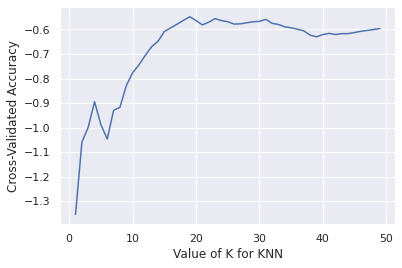

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## random forest